# PyTorch: Aprendiendo Fashion-MNIST

## Refs.

* https://pytorch.org/tutorials/beginner/basics/optimization_tutorial.html

* https://github.com/zalandoresearch/fashion-mnist

* https://github.com/pranay414/Fashion-MNIST-Pytorch/blob/master/fashion_mnist.ipynb

## **Ejercicio 1)** Importando librerías

**0)** De ser necesario, **instale PyTorch** escribiendo

    !pip3 install torch torchvision torchaudio torchviz

**1)** Importe las librerías estandard de Python: `os`, `datetime`, `collections` y `pickle`.

**2)** Importe las siguientes librerías third party de Python: `matplotlib.pyplot`, `numpy`, `scipy`, `sklearn`, `pandas`, `dill` y `json`.

**3)** Importe las librerias necesarias de **PyTorch**: `torch` y `torchvision`.

**4)** Importe la librería: `google.colab`.

In [2]:
# 1.0)
# !pip3 install torch torchvision torchaudio torchviz

In [3]:
# 1.1)
import os
import pickle
import datetime
from collections import defaultdict

In [4]:
# 1.2)
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
# import scipy as sp
# import scipy.linalg as linalg
# import sklearn as skl
# import pandas as pd
#import dill
# import json

In [5]:
# 1.3)
import torch
import torch.optim as optim
from torch import nn
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader, Subset, random_split
from torchvision import datasets
from torchvision import transforms
from torchvision.io import read_image
from torchvision.transforms import ToTensor, Lambda, Compose
#from torchviz import make_dot

In [6]:
# 1.4)
# import google.colab
# from google.colab import files

In [7]:
from tqdm import tqdm

## **Ejercicio 2)**

Bajando y Jugando con el dataset **Fashion-MNIST**.

**1)** Baje y transforme (i.e. normalize los valores al rango [0,1]) los conjuntos de entrenamiento y testeo de FashionMNIST.

**2)** Explore algunos ejemplos de estos conjuntos. Que formato poseen?

**3)** Visitando la página web de FashionMNIST, cree un diccionario de Python `Dict()` asociando cada categoría a un nombre adecuado de la misma.

**4)** Grafique un mosaico de 3x3 imagenes de FashionMNIST, cada una titulada con su respectiva clasificación

In [8]:
# 2.1)
# Se define un transformador para las imágenes,
# que las convierte en tensores y las normaliza.
transform = Compose([
                    ToTensor(),
                    transforms.Normalize((0.5,), (0.5,))
                    ])

# Descarga y carga los conjuntos de datos de entrenamiento y validación.
train_set = datasets.FashionMNIST('MNIST_data/', download=True, train=True, transform=transform)
eval_set = datasets.FashionMNIST('MNIST_data/', download=True, train=False, transform=transform)


In [9]:
# 2.2)
len(train_set), len(eval_set)

(60000, 10000)

In [10]:
train_set[123][1]

2

In [11]:
# 2.3)
map_labels = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

In [12]:
map_labels[train_set[123][1]]

'Pullover'

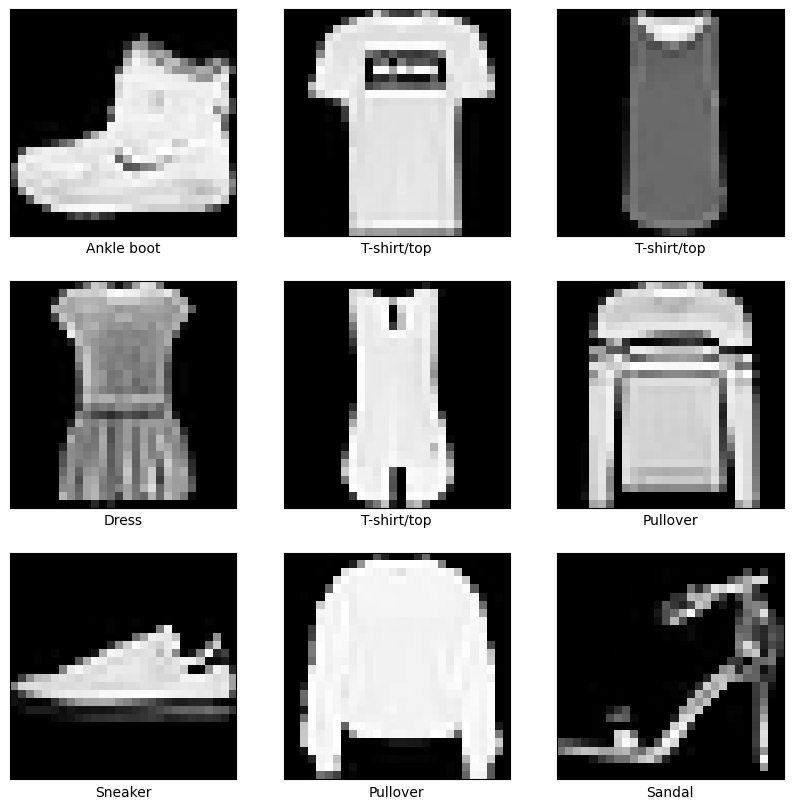

In [13]:
# 2.4)
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_set[i][0].squeeze(), cmap="Greys_r")
    plt.xlabel(map_labels[train_set[i][1]])

## Ejercicio 3)

Creando un `DataLoader` para alimentar el modelo con batchs (lotes) de entrenamiento.

**1)** Cree los `DataLoader`s para cada conjunto. Defínalos con un `batch_size` de 100 y con el flag `shuffle` seteado a `True`.

**2)** Use uno de los `DataLoader`s creados anteriormente para explorar algunos elementos del conjunto.

Notar que, el iterador devuelve el batch en un par `(image,label)`.

El objeto `images` es un tensor de dimensiones `(100,1,28,28)`.
El 100 es el tamaño del batch.
El 1 porque hay un solo canal (en este caso, un canal de escala de grises, pero podría haber varios, p. ej. uno por cada color de {Red, Green Blue} en caso que fuesen imagenes a color).
Luego, 28 y 28 porque cada imagen del dataset es de 28 x 28 píxeles.

El objeto `labels` es un tensor de dimensiones `(100,)`.
La $i$-ésima entrada `labels[i]` de `labels` es un número en $\{0,1,...,9\}$ indicando la categoría a la que pertenece la $i$-ésima imagen en el batch, guardada en `images[i]`.

In [14]:
# 3.1)
train_loader = DataLoader(train_set, batch_size=16, shuffle=True)
eval_loader = DataLoader(eval_set, batch_size=16, shuffle=True)

In [15]:
# 3.2)
image, label = next(iter(train_loader))
image.shape, label.shape


(torch.Size([16, 1, 28, 28]), torch.Size([16]))

'Sandal'

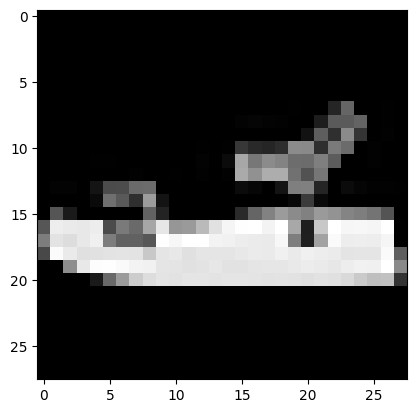

In [16]:
plt.imshow(image[0].squeeze(), cmap="Greys_r")
map_labels[label[0].item()]

## Ejercicio 4)

Defina una red neuronal de 4 capas, una de entrada, dos ocultas de $n_1=128$ y $n_2=64$ neuronas, respectivamente, y una de salida de 10 neuronas.

En las capas intermedias utilice neuronas tipo ReLU y agregueles un *dropout* de p=0.2.
En la capa de salida no utilice funciones de activación ni dropout.

Las capas sucesivas tienen que estar totalmente conectadas entre si.

In [17]:

# 4)
class NeuralNetwork(nn.Module):
    def __init__(self, v1, v2, p=0.2):
        super(NeuralNetwork, self).__init__()

        self.flatten = nn.Flatten() # Capa de entrada
        self.sequence = nn.Sequential(
            nn.Linear(28*28, v1), # Capa oculta 1
            nn.ReLU(), # Función de activación
            nn.Dropout(p), # Dropout
            nn.Linear(v1, v2), # Capa oculta 2
            nn.ReLU(), # Función de activación
            nn.Dropout(p), # Dropout
            nn.Linear(v2, 10), # Capa de salida
        )

    def forward(self, x):
        x = self.flatten(x)
        x = self.sequence(x)
        return x

## Ejercicio 5)

Entrenamos el modelo

**1)** Implemente, en una función, un loop de entrenamiento que recorra los batchs (lotes).

In [18]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # Seleccionamos el dispositivo

In [19]:
# 5.1)
def train_loop(model, train_loader, loss_function, optimizer):
    model.train() # Se pone el modelo en modo de entrenamiento
    sum_batch_avg_loss = 0 # Inicializamos la suma de las pérdidas promedio de los batches
    sum_correct = 0 # Inicializamos la suma de las predicciones correctas
    num_processed_examples = 0 # Inicializamos la cantidad de ejemplos procesados

    for batch_number, (images, labels) in enumerate(train_loader):
            
        images = images.to(device) # Se envía la imagen al dispositivo
        labels = labels.to(device) # Se envía la etiqueta al dispositivo
        batch_size = len(images) # Se obtiene el tamaño del lote

        # Se obtiene la predicción del modelo y se calcula la pérdida 
        pred = model(images)
        loss = loss_function(pred, labels)
        
        # Backpropagation usando el optimizador 
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Calculamos la perdida promedio del batch y lo agregamos a la suma total
        batch_avg_loss = loss.item() 
        sum_batch_avg_loss += batch_avg_loss

        # Calculamos la cantidad de predicciones correctas
        sum_correct += (pred.argmax(1) == labels).sum().item()

        # Calculamos la cantidad total de predicciones procesadas
        num_processed_examples += batch_size

    # Calculamos la perdida promedio de todos los batches
    avg_loss = sum_batch_avg_loss / len(train_loader)
    # Calculamos la precisión del modelo
    accuracy = sum_correct / len(train_loader.dataset)

    return avg_loss, accuracy 



**2)** Implemente, en una función, un loop de validación que recorra los batchs.


In [20]:
def eval_loop(model, valid_loader, loss_function):
    model.eval() # Se pone el modelo en modo de evaluación

    sum_batch_avg_loss = 0 # Inicializamos la suma de las pérdidas promedio de los batches
    sum_correct = 0 # Inicializamos la suma de las predicciones correctas
    num_processed_examples = 0 # Inicializamos la cantidad de ejemplos procesados

    for batch_number, (images, labels) in enumerate(valid_loader):
        images = images.to(device) # Se envía la imagen al dispositivo
        labels = labels.to(device) # Se envía la etiqueta al dispositivo
        batch_size = len(images)

        # Se obtiene la predicción del modelo y se calcula la pérdida
        pred = model(images)
        loss = loss_function(pred, labels)

        # Calculamos la perdida promedio del batch y lo agregamos a la suma total
        batch_avg_loss = loss.item()
        sum_batch_avg_loss += batch_avg_loss

        # Calculamos la cantidad de predicciones correctas
        sum_correct += (pred.argmax(1) == labels).sum().item()
        
        # Calculamos la cantidad total de predicciones procesadas
        num_processed_examples += batch_size

    # Calculamos la perdida promedio de todos los batches
    avg_loss = sum_batch_avg_loss / len(valid_loader)
    # Calculamos la precisión del modelo
    accuracy = sum_correct / len(valid_loader.dataset)

    return avg_loss, accuracy



**3)** Inicialize dos `DataLoader`s llamados `train_loader` y `valid_loader` a partir del `train_set` (conjunto de entranmiento) y del `valid_set` (conjunto de validación) de Fashion-MNIST, respectivamente, y que usen batchs de 100 ejemplos.


In [21]:
train_loader = DataLoader(train_set, batch_size=16, shuffle=True, num_workers=os.cpu_count()-1)
eval_loader = DataLoader(eval_set, batch_size=16, shuffle=True, num_workers=os.cpu_count()-1)


**4)** Cree una función de pérdida usando la **Cross Entropy Loss**.

**IMPORTANTE:** Notar que la **Cross Entropy Loss** aplica automáticamente una `log_softmax`.



In [22]:
loss_function = nn.CrossEntropyLoss() # Función de pérdida

**6)** Cree una instancia del modelo.

In [23]:
# Creo el modelo
v1 = 128
v2 = 64
model = NeuralNetwork(v1, v2) # Modelo

**5)** Cree un optimizador que utilice el método de **Stochastic Gradient Descent** con un learning rate igual a $10^{-3}$.



In [24]:
# Creo el optimizador
# optimizer = optim.SGD(model.parameters(), lr=0.001) # Optimizador
optimizer = optim.Adam(model.parameters(), lr=0.001) # Optimizador

**7)** Especifique en que dispositivo (`device`) va a trabajar: en una **CPU** o en una **GPU**.



In [25]:
model = model.to(device) # Enviamos el modelo al dispositivo

**8)** Implemente un loop de entrenamiento y validación que trabaje con el `train_loader` y el `valid_loader`, respectivamente, usando un numero arbitrario de épocas.
Este loop debe guardar en cuatro listas los valores de los promedios del **Cross Entropy Loss** y las fracciones de clasificaciones correctas o **precisión** (accuracy) sobre el conjunto de **entrenamiento** y el de **validación**, respectivamente.

**IMPORTANTE:** No olvide copiar los batchs al dispositivo de trabajo.



**9)** Entrene y valide el modelo.



In [27]:
# Entrenamos el modelo
epochs = 60

training_loss = []
training_accuracy = []
train_loss = []
train_accuracy = []
eval_loss = []
eval_accuracy = []

for epoch in tqdm(range(epochs)):
    training_avg_loss, training_acc = train_loop(model, train_loader, loss_function, optimizer)
    train_avg_loss, train_acc = eval_loop(model, train_loader, loss_function)
    valid_avg_loss, valid_acc = eval_loop(model, eval_loader, loss_function)

    training_loss.append(training_avg_loss)
    training_accuracy.append(training_acc)
    train_loss.append(train_avg_loss)
    train_accuracy.append(train_acc)
    eval_loss.append(valid_avg_loss)
    eval_accuracy.append(valid_acc)

print("Training complete!")

100%|██████████| 60/60 [25:30<00:00, 25.51s/it]

Training complete!


**10)** Use las listas del inciso anterior para graficar en función de las épocas la **Cross Entropy Loss** de **entrenamiento** y de **validación**.
Realize un gráfico análogo pero con la **precisión**.
Discuta y comente, cual es el número óptimo de épocas de entrenamiento?



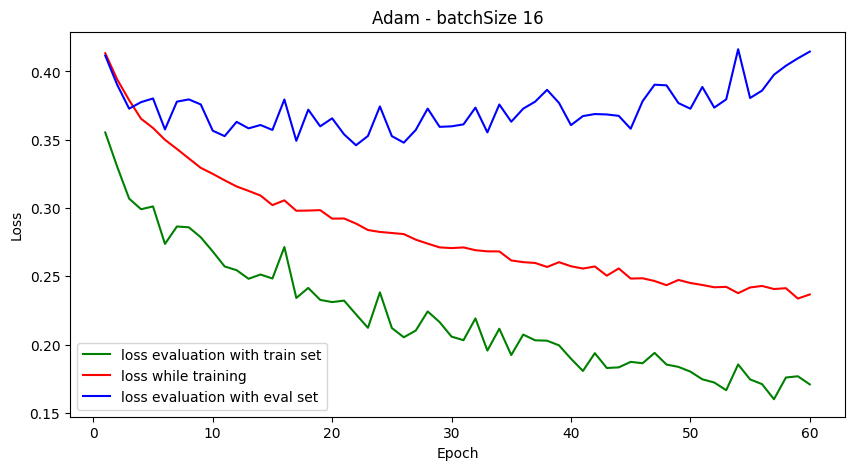

In [28]:
# Grafica de la pérdida
plt.figure(figsize=(10, 5))
plt.title(f"Adam - batchSize 16")
plt.plot(range(1, len(train_loss)+1),train_loss, color="green", label='loss evaluation with train set')
plt.plot(range(1, len(training_loss)+1),training_loss, color="red", label='loss while training')
plt.plot(range(1, len(eval_loss)+1),eval_loss, color="blue", label='loss evaluation with eval set')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

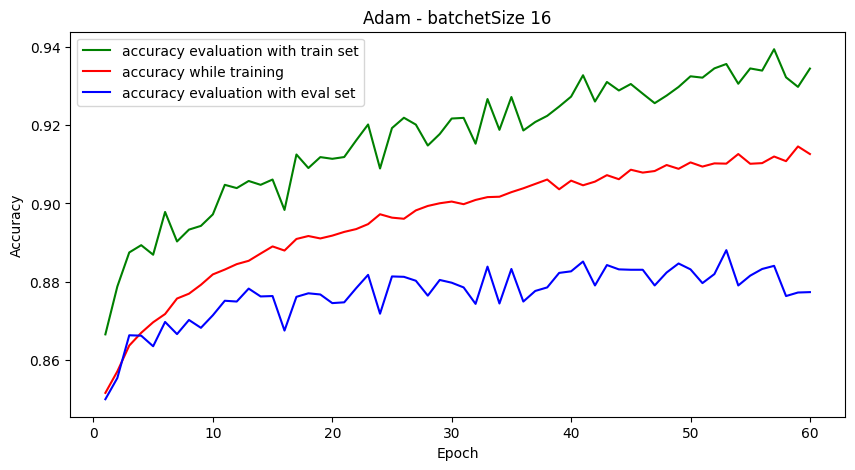

In [29]:
# Grafica de la presición
plt.figure(figsize=(10, 5))
plt.title("Adam - batchetSize 16")
plt.plot(range(1, len(train_accuracy)+1),train_accuracy, color="green", label='accuracy evaluation with train set')
plt.plot(range(1, len(training_accuracy)+1),training_accuracy, color="red", label='accuracy while training')
plt.plot(range(1, len(eval_accuracy)+1),eval_accuracy, color="blue", label='accuracy evaluation with eval set')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [32]:
index = len(training_loss)-1 
print(f"train_loss: {train_loss[index]}")
print(f"training_loss: {training_loss[index]}")
print(f"eval_loss:{eval_loss[index]}")

print(f"train_accuracy: {train_accuracy[index]}")
print(f"training_accuracy: {training_accuracy[index]}")
print(f"eval_accuracy:{eval_accuracy[index]}")

train_loss: 0.1707954580652838
training_loss: 0.23665763278867427
eval_loss:0.4144954927712679
train_accuracy: 0.9343833333333333
training_accuracy: 0.9126
eval_accuracy:0.8774


In [31]:
max_train_accuracy = max(train_accuracy)
max_train_index = train_accuracy.index(max_train_accuracy)

print("Maximum train accuracy:", max_train_accuracy)
print("Index of maximum train accuracy:", max_train_index)

max_training_accuracy = max(training_accuracy)
max_training_index = training_accuracy.index(max_training_accuracy)

print("Maximum training accuracy:", max_training_accuracy)
print("Index of maximum training accuracy:", max_training_index)

max_value = max(eval_accuracy)
max_index = eval_accuracy.index(max_value)

print("Máximo valor:", max_value)
print("Índice del máximo valor:", max_index)

Maximum train accuracy: 0.9393166666666667
Index of maximum train accuracy: 56
Maximum training accuracy: 0.9145333333333333
Index of maximum training accuracy: 58
Máximo valor: 0.8881
Índice del máximo valor: 52


**11)** Repita los experimentos variando hiperparámetros. Por ejemplo:

- El learning-rate.
- El optimizador (ej. puede usar ADAM).
- El valor de dropout.
- El número de neuronas en las capas intermedias.
- El número de épocas de entrenamiento.
- El tamaño de los lotes.

Discuta los resultados.

In [ ]:
# torch.save({
            # 'modelJupiterace_state_dict': model.state_dict(),
            # 'optimizerA_state_dict': optimizer.state_dict(),
            # }, "models/models.pt")